# 🕵️‍♂️ **CivDexAI: Unmasking Team Rocket!**

**Created by:** [Glen Valencius](https://github.com/glenvj-j)  


**Inspired by:** Kotso P's dataset  
🔗 [View the Dataset on Kaggle](https://www.kaggle.com/datasets/kotsop/pokmon-detective-challenge/data)

---

Welcome, brave detective! 🕵️‍♀️  
Your mission is clear: uncover the secret Team Rocket agents hiding among innocent civilians.

In this interactive notebook, we’ll train a powerful classification model using data clues to expose these undercover villains.

We will name the model CivDexAI, inspired by PokeDex but for the people.

---

### 🧠 Think you can outsmart the AI?

At the end of the notebook, challenge the machine in a battle of wits—can your instincts beat CivDexAI at spotting Team Rocket?

---


# **Creating Model for Prediction**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200

We will separate the dataframe to df_train and df_test, df_train contain Team Rocket data and df_test doesn't had data in Team Rocket column which is NaN.

In [3]:
df = pd.read_csv('pokemon_team_rocket_dataset.csv').drop(columns=['ID'])
df_train = df[df['Team Rocket'].notna()]
df_test = df[df['Team Rocket'].isna()]
df_train.shape,df_test.shape

((4000, 17), (1000, 17))

In [4]:
# This function check all unique from each column
def check_all_unique(df) :
    pd.set_option('display.max_colwidth', None)
    listItem = []
    for col in df.columns :
        listItem.append( [col, df[col].nunique(), df[col].unique()])

    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                        data=listItem)
    return tabel1Desc

check_all_unique(df_train)

,Column Name,Number of Unique,Unique Sample
0,Age,61,"[27, 55, 14, 41, 15, 21, 25, 40, 20, 43, 29, 11, 35, 12, 49, 70, 48, 54, 69, 32, 19, 17, 10, 50, 67, 26, 38, 34, 31, 56, 42, 47, 44, 51, 57, 18, 46, 33, 30, 58, 36, 13, 53, 64, 52, 16, 24, 39, 37, 28, 22, 61, 68, 65, 59, 45, 60, 66, 23, 63, 62]"
1,City,10,"[Pewter City, Viridian City, Pallet Town, Cerulean City, Lavender Town, Celadon City, Saffron City, Cinnabar Island, Fuchsia City, Vermilion City]"
2,Economic Status,3,"[Middle, High, Low]"
3,Profession,16,"[Fisherman, PokéMart Seller, Police Officer, Gym Leader Assistant, Daycare Worker, Casino Worker, Rocket Grunt, Breeder, Nurse, Researcher, Elite Trainer, Scientist, Black Market Dealer, Champion, Biker, Underground Battler]"
4,Most Used Pokemon Type,18,"[Rock, Grass, Poison, Dragon, Ground, Ghost, Bug, Fighting, Electric, Flying, Ice, Psychic, Fire, Fairy, Water, Dark, Steel, Normal]"
5,Average Pokemon Level,96,"[50, 35, 96, 23, 16, 87, 58, 84, 73, 9, 98, 8, 95, 70, 33, 81, 80, 63, 5, 78, 40, 7, 51, 27, 90, 14, 38, 83, 93, 24, 72, 92, 45, 18, 99, 30, 53, 19, 34, 59, 77, 55, 26, 57, 66, 100, 79, 28, 43, 65, 47, 13, 22, 74, 69, 71, 54, 89, 56, 20, 52, 60, 31, 46, 6, 41, 75, 82, 17, 32, 10, 42, 62, 67, 97, 94, 39, 91, 48, 37, 68, 49, 15, 36, 64, 25, 86, 61, 12, 76, 11, 21, 88, 44, 29, 85]"
6,Criminal Record,2,"[0, 1]"
7,PokéBall Usage,10,"[DuskBall, HealBall, NetBall, UltraBall, TimerBall, MasterBall, LuxuryBall, DarkBall, PokéBall, GreatBall]"
8,Win Ratio,71,"[51, 53, 76, 27, 52, 35, 44, 20, 55, 77, 34, 23, 80, 60, 54, 37, 59, 71, 66, 25, 63, 28, 36, 40, 85, 61, 47, 84, 57, 31, 74, 41, 46, 49, 32, 75, 62, 22, 38, 48, 68, 43, 78, 73, 26, 70, 33, 21, 42, 83, 50, 56, 58, 72, 79, 24, 69, 86, 29, 67, 30, 65, 90, 39, 45, 82, 64, 81, 89, 87, 88]"
9,Number of Gym Badges,9,"[1, 2, 5, 0, 4, 6, 3, 8, 7]"


In [5]:
def check_duplicate(df):
    if df.duplicated().sum() > 0:
        total_duplicated = df.duplicated().sum()
        total_percentage_duplicated = round(total_duplicated / df.shape[0] * 100, 2)
        original_data = df.shape[0]
        print(f'Total Duplicated Data: {total_duplicated} rows ({total_percentage_duplicated}% of overall data)')
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)

        if total_percentage_duplicated < 1:
            user_input = input("Do you want to delete the duplicated data? (yes/no): ").strip().lower()
            if user_input in ("yes", "y"):
                df.drop_duplicates(inplace=True)
                after_data = df.shape[0]
                print(f'Duplicated data successfully deleted. Total deleted: {original_data - after_data}')
            else:
                print("No action taken. Duplicated data was not deleted.")
        else:
            print("Duplicated data is more than 1% of the dataset. Please check manually.")
        return duplicated_rows.index
    else:
        print("No duplicated data found.")
        return None
check_duplicate(df_train)

No duplicated data found.


In [6]:
def check_data_summary(df):
    # Create DataFrame for NaN summary
    nan_summary = pd.DataFrame({
        'Total NaN': df.isna().sum(),
        'Percentage NaN': round(df.isna().sum() / df.shape[0] * 100, 2),
        'Non-Null Count': df.notnull().sum(),
        'Data Type': df.dtypes
    })

    nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column Name'})

    print('=============== Data Summary ===============')
    display(nan_summary.sort_values(by='Percentage NaN', ascending=False))

check_data_summary(df_train)

=============== Data Summary ===============


,Column Name,Total NaN,Percentage NaN,Non-Null Count,Data Type
0,Age,0,0.0,4000,int64
9,Number of Gym Badges,0,0.0,4000,int64
15,Charity Participation,0,0.0,4000,bool
14,Debt to Kanto,0,0.0,4000,int64
13,Rare Item Holder,0,0.0,4000,bool
12,Number of Migrations,0,0.0,4000,int64
11,Battle Strategy,0,0.0,4000,object
10,Is Pokemon Champion,0,0.0,4000,bool
8,Win Ratio,0,0.0,4000,int64
1,City,0,0.0,4000,object


In [7]:
# Show how much NaN in each column
def check_NaN_total(df):
    percentage_nan = pd.DataFrame({
    'Total NaN': df.isna().sum(),
    'Percentage' : round(df.isna().sum()/df.shape[0]*100)
    })
    print('=============== Total NaN in each column ===============')
    display(percentage_nan.sort_values(by='Percentage',ascending=False))
check_NaN_total(df_train)

=============== Total NaN in each column ===============


,Total NaN,Percentage
Age,0,0.0
Number of Gym Badges,0,0.0
Charity Participation,0,0.0
Debt to Kanto,0,0.0
Rare Item Holder,0,0.0
Number of Migrations,0,0.0
Battle Strategy,0,0.0
Is Pokemon Champion,0,0.0
Win Ratio,0,0.0
City,0,0.0


## Cleaning

1. Change Team Rocket Column Type to 1 and 0

In [8]:
df_train['Team Rocket'] = df_train['Team Rocket'].map({'Yes': True, 'No': False}).astype(bool)

## EDA

In [9]:
df_train.head()

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
0,27,Pewter City,Middle,Fisherman,Rock,50,0,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,HealBall,53,2,False,Unpredictable,19,False,177516,True,True
2,14,Pallet Town,High,Police Officer,Poison,96,0,NetBall,76,5,False,Aggressive,18,False,85695,True,False
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,UltraBall,27,0,False,Defensive,10,False,39739,True,False
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,HealBall,51,1,False,Aggressive,17,True,126923,False,True


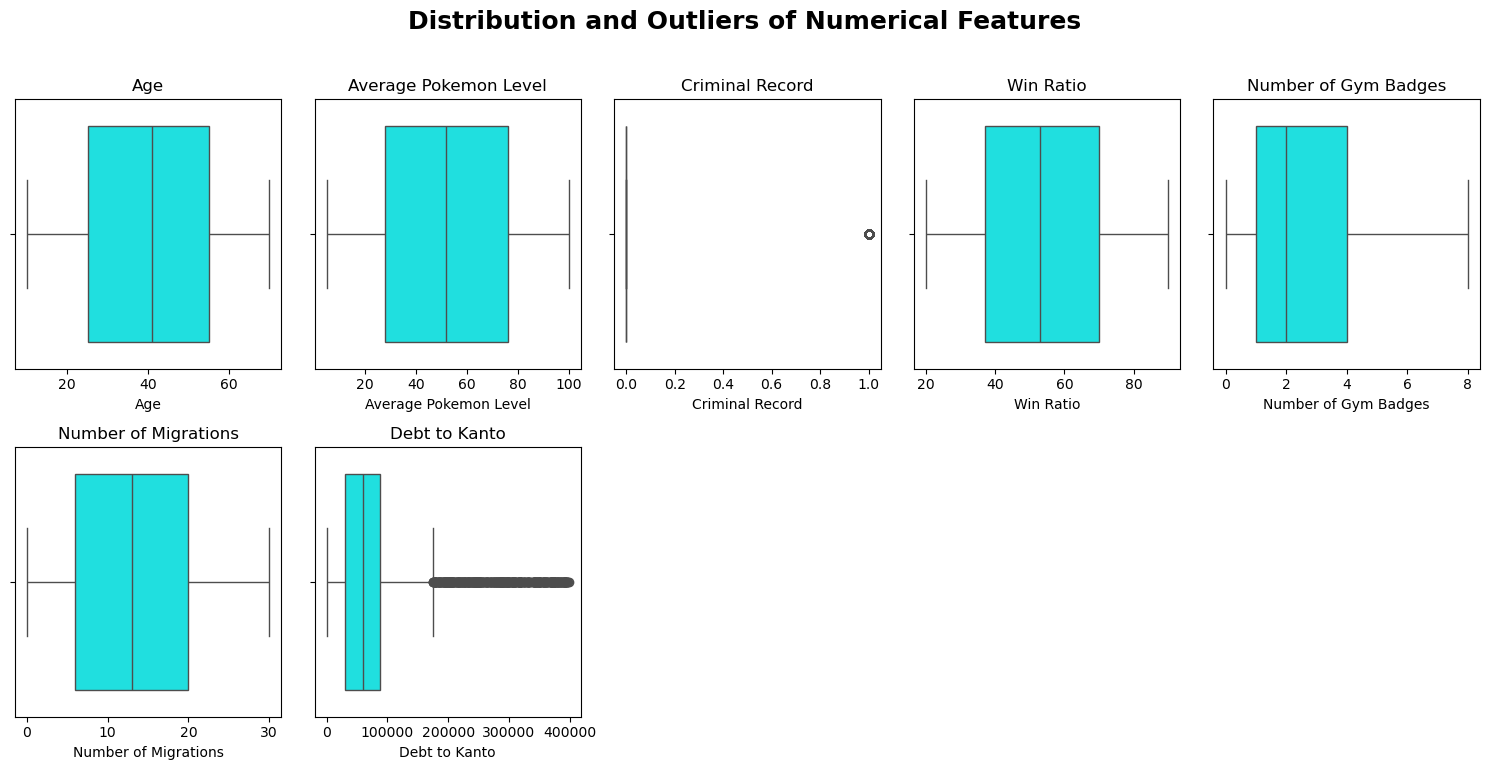

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_boxplots(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Distribution and Outliers of Numerical Features'):
    """
    Plots boxplots of numerical features from a DataFrame.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, x=col, ax=axes[i], color='cyan')
        axes[i].set_title(col, fontsize=12)

    # Turn off any empty subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    # Add a big title
    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()
plot_numerical_boxplots(df_train, drop_cols=[], num_cols=5)

Debt got so many outlier but we will keep this because it will give a insight for prediction

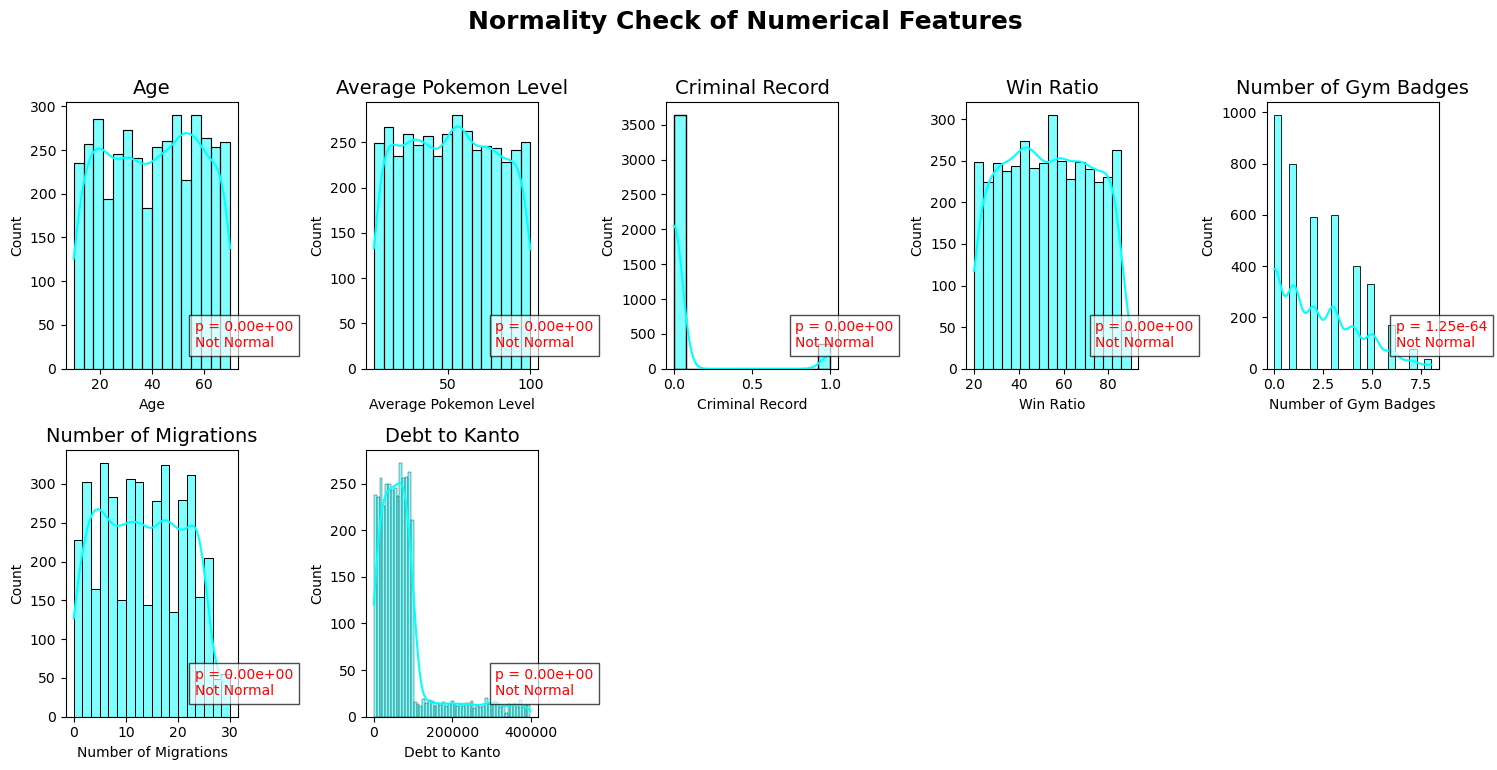

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

def plot_normality_tests(df, drop_cols=None, num_cols=5, figsize=(15, 7.5), title='Normality Check of Numerical Features'):
    """
    Plots histograms with KDE and normality test results for numerical columns.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before selecting numerical columns
    - num_cols: Number of plots per row
    - figsize: Size of the full figure
    - title: Title for the full plot
    """
    if drop_cols is None:
        drop_cols = []

    # Select numerical columns
    numerical_cols = df.drop(columns=drop_cols).select_dtypes(include=['number']).columns
    num_rows = int(np.ceil(len(numerical_cols) / num_cols))

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, ax=axes[i], color='cyan', kde=True)
        axes[i].set_title(col, fontsize=14)

        # Perform normality test
        stat, p_value = normaltest(df[col])

        # Conclusion
        conclusion = "Normal" if p_value >= 0.05 else "Not Normal"

        # Annotate result
        axes[i].annotate(
            f"p = {p_value:.2e}\n{conclusion}",
            xy=(0.75, 0.08), xycoords='axes fraction',
            fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.7)
        )

    # Hide unused subplots
    for ax in axes[len(numerical_cols):]:
        ax.axis('off')

    fig.suptitle(title, fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
plot_normality_tests(df_train, drop_cols=[], num_cols=5)


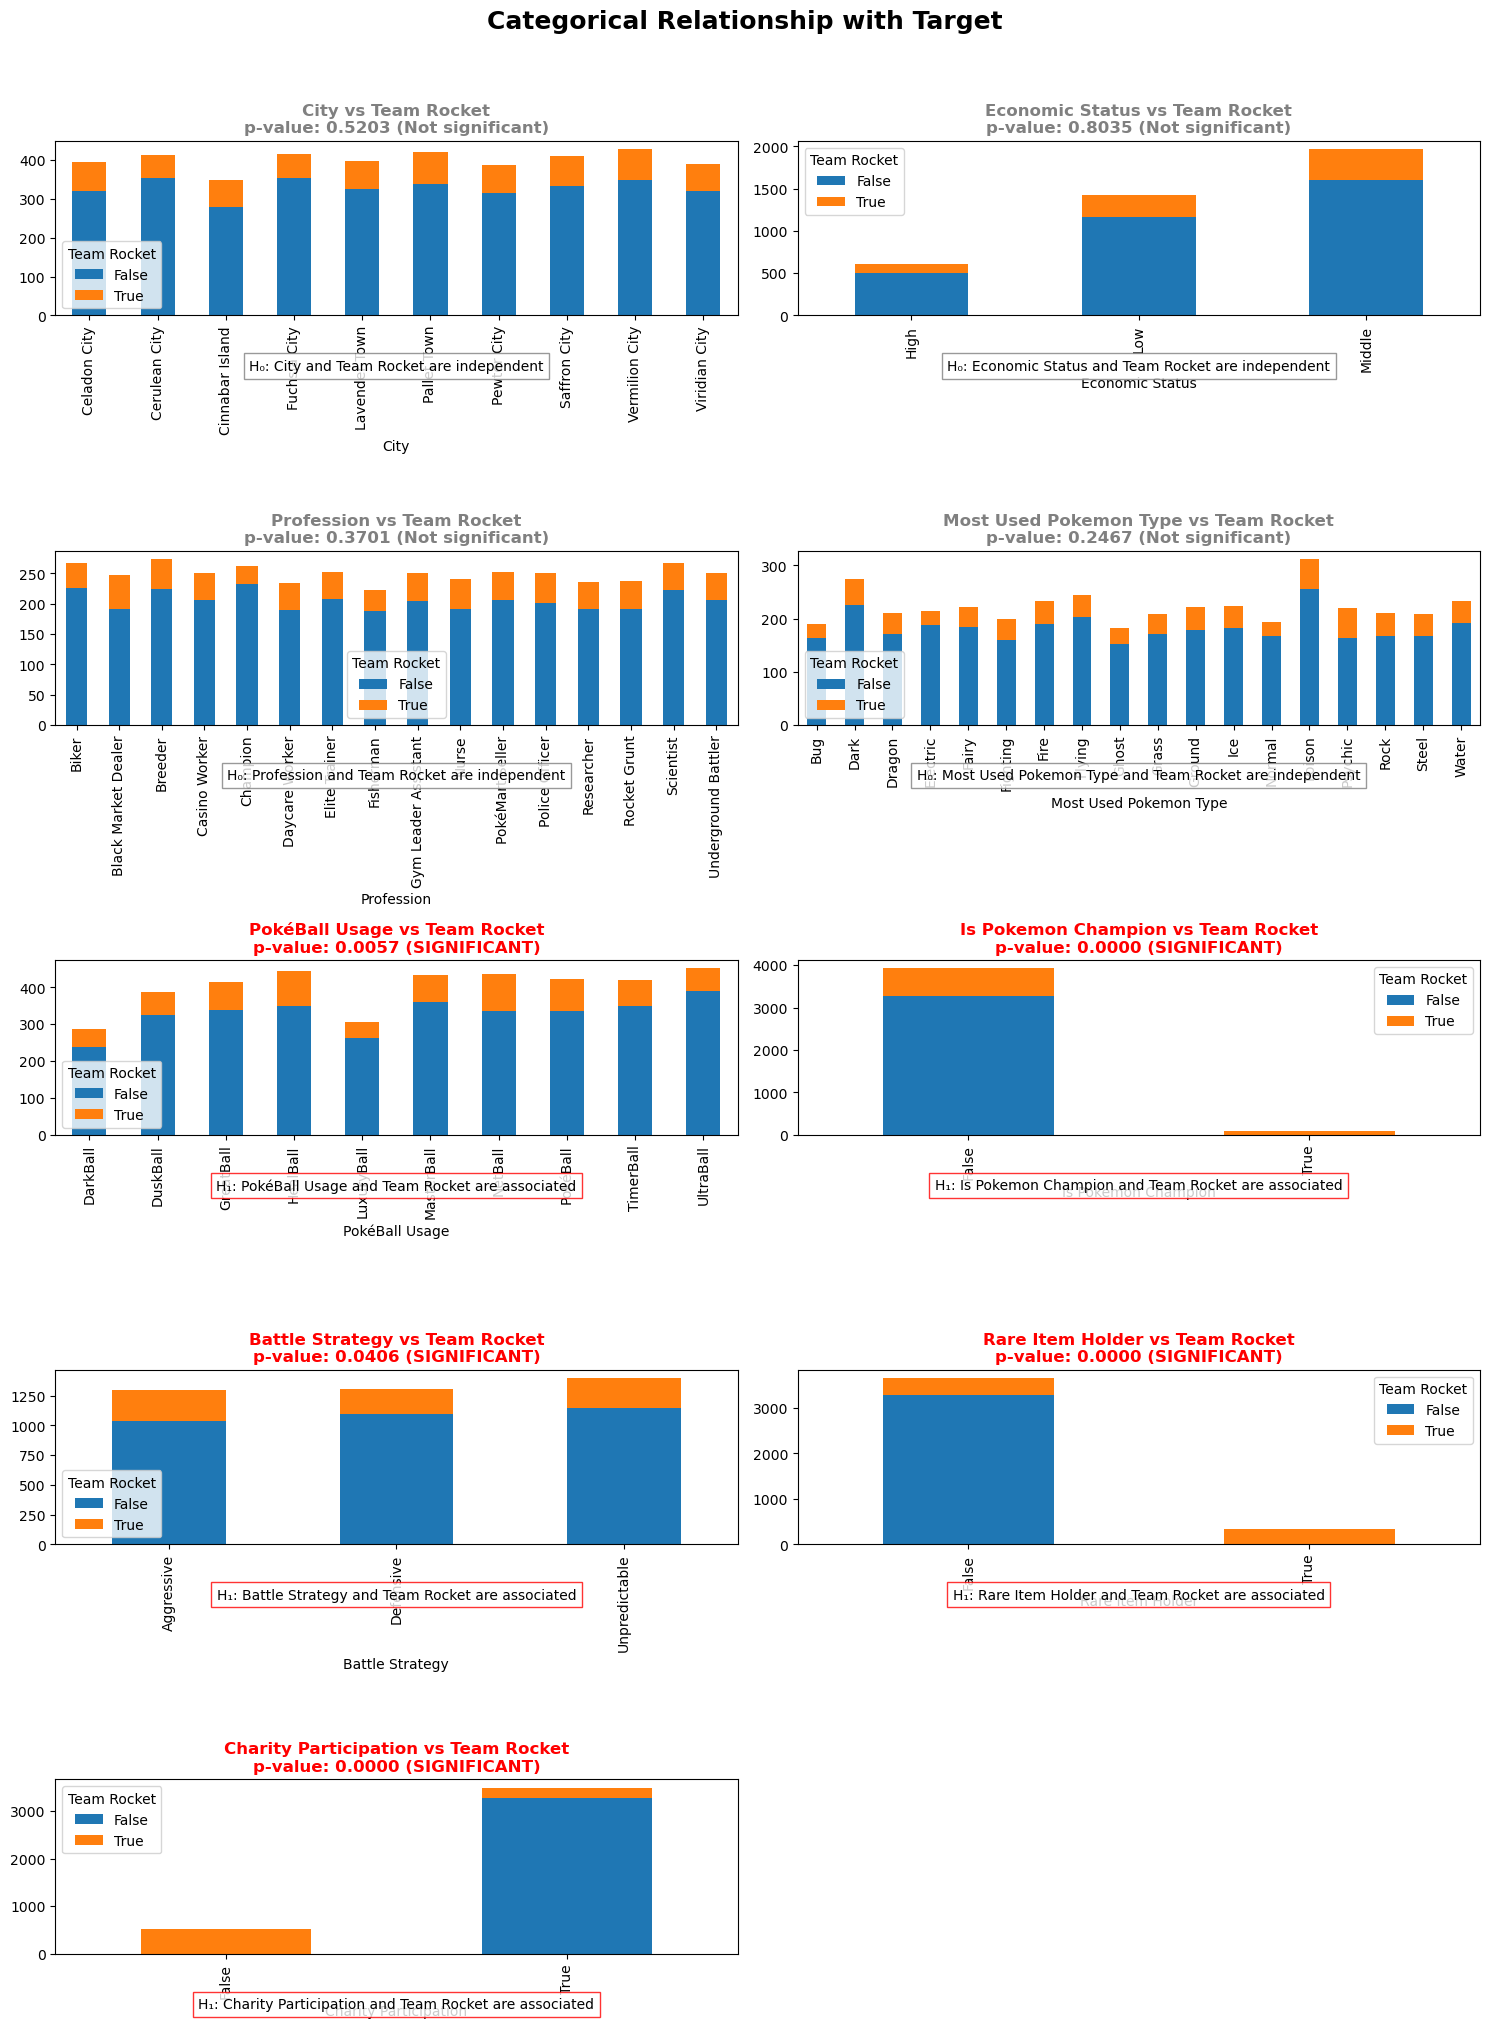


SUMMARY OF STATISTICAL ANALYSIS

Significant features affecting Team Rocket (p < 0.05):
['PokéBall Usage', 'Is Pokemon Champion', 'Battle Strategy', 'Rare Item Holder', 'Charity Participation']


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from IPython.display import display
import math

def analyze_categorical_relationships(df, target_col='Attrition', drop_cols=['EmpID'], 
                                    significance_level=0.05, figsize=(15, 20)):
    """
    Analyze relationships between categorical columns and a target column using Chi-Square tests.
    Visualizes all results in a single figure with subplots, showing only H1 for significant
    and H0 for non-significant results.
    
    Parameters:
    - df: DataFrame to analyze
    - target_col: Target column for analysis (default 'Attrition')
    - drop_cols: Columns to exclude from analysis (default ['EmpID'])
    - significance_level: Threshold for statistical significance (default 0.05)
    - figsize: Size of the combined figure (default (15, 20))
    
    Returns:
    - Dictionary with results including significant features and their percentages
    """
    
    def calculate_percentage(df, column, target):
        df_test = df.groupby(column)[target].value_counts().unstack().fillna(0)

        target_classes = df[target].dropna().unique()
        if len(target_classes) != 2:
            raise ValueError(f"Target column '{target}' must have exactly 2 unique values, but found: {target_classes}")

        positive_class = target_classes[1]  # Choose the second class as "positive" (you can swap if needed)
        negative_class = target_classes[0]

        df_test["Percentage"] = round((df_test[positive_class] / (df_test[positive_class] + df_test[negative_class])) * 100, 2)

        return df_test.sort_values(by='Percentage', ascending=False)

    
    # Initialize results storage
    results = {
        'significant_features': [],
        'all_tests': {},
        'percentages': {}
    }
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category','bool']).columns
    categorical_cols = [col for col in categorical_cols 
                       if col not in drop_cols and col != target_col and df[col].nunique() > 1]
    
    # Calculate grid size for subplots
    n_cols = 2
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Create contingency table
        contingency_table = df.groupby(col)[target_col].value_counts().unstack().fillna(0)
        
        # Perform Chi-Square Test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Determine significance
        is_significant = p_value < significance_level
        sig_color = 'red' if is_significant else 'gray'
        sig_text = "SIGNIFICANT" if is_significant else "Not significant"
        
        # Plot contingency table
        contingency_table.plot(kind='bar', stacked=True, ax=ax)
        
        # Add title with p-value and significance
        title = f"{col} vs {target_col}\n"
        title += f"p-value: {p_value:.4f} ({sig_text})"
        ax.set_title(title, color=sig_color, fontweight='bold')
        
        # Add only the relevant hypothesis to plot
        hypothesis_text = (f"H₁: {col} and {target_col} are associated" if is_significant 
                          else f"H₀: {col} and {target_col} are independent")
        
        ax.text(0.5, -0.25, hypothesis_text, transform=ax.transAxes,
                ha='center', va='top', fontsize=10, 
                bbox=dict(facecolor='white', alpha=0.8, edgecolor=sig_color))
        
        # Store results
        test_result = {
            'p_value': p_value,
            'is_significant': is_significant,
            'contingency_table': contingency_table,
            'null_hypothesis': f"H₀: {col} and {target_col} are independent",
            'alternative_hypothesis': f"H₁: {col} and {target_col} are associated"
        }
        results['all_tests'][col] = test_result
        
        # If significant, store details
        if is_significant:
            results['significant_features'].append(col)
            percentages = calculate_percentage(df, col, target_col)
            results['percentages'][col] = percentages
    
    # Hide unused axes
    fig.suptitle('Categorical Relationship with Target', fontsize=18, fontweight='bold', y=1.02)

    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SUMMARY OF STATISTICAL ANALYSIS")
    print("="*60)
    print(f"\nSignificant features affecting {target_col} (p < {significance_level}):")
    print(results['significant_features'])
    
    return results

# Example usage:
results = analyze_categorical_relationships(df_train, 
                                          target_col='Team Rocket', 
                                          drop_cols=[],
                                          significance_level=0.05)



In [13]:
from IPython.display import display, HTML

def side_by_side(df_list, titles=None, space=5, table_width="350px", container_height="auto"):
    """
    Display multiple DataFrames side by side with horizontal scroll
    
    Parameters:
    - df_list: List of DataFrames to display
    - titles: List of titles for each DataFrame (optional)
    - space: Spacing between tables in pixels
    - table_width: Width of each individual table
    - container_height: Height of the scrolling container (default auto)
    """
    if titles is None:
        titles = [""] * len(df_list)
    
    html = f'<div style="overflow-x: auto; white-space: nowrap; height:{container_height}; padding-bottom:10px;">'
    
    for df, title in zip(df_list, titles):
        html += f"""
        <div style="display:inline-block; vertical-align:top; margin-right:{space}px; width:{table_width}">
            <h4 style="text-align:center">{title}</h4>
            {df.to_html()}
        </div>
        """
    
    html += '</div>'
    display(HTML(html))


def show_significant_percentages(results, target_label="Attrition", space=5):
    """
    Display significant feature percentages side-by-side based on chi-square results.

    Parameters:
    - results: Dictionary containing 'significant_features' and 'percentages'
    - target_label: Label to use in the titles (default: 'Attrition')
    - space: Spacing between tables in pixels
    """
    if 'significant_features' in results and len(results['significant_features']) > 0:
        df_list = [results['percentages'][feat] for feat in results['significant_features']]
        titles = [f"{target_label} by {feat}" for feat in results['significant_features']]
        
        side_by_side(df_list, titles=titles, space=space)
        
        print("\nYou can access individual tables with:")
        print("results['percentages']['FeatureName']")
        print("Available features:", results['significant_features'])
    else:
        print("No significant features found.")
show_significant_percentages(results, target_label="Team Rocket")

Team Rocket,False,True,Percentage
PokéBall Usage,,,
NetBall,335,100,22.99
HealBall,349,96,21.57
PokéBall,335,87,20.62
GreatBall,338,77,18.55
DarkBall,239,49,17.01
MasterBall,360,73,16.86
TimerBall,350,69,16.47
DuskBall,324,62,16.06
LuxuryBall,261,45,14.71



You can access individual tables with:
results['percentages']['FeatureName']
Available features: ['PokéBall Usage', 'Is Pokemon Champion', 'Battle Strategy', 'Rare Item Holder', 'Charity Participation']


In [14]:
results['percentages']['PokéBall Usage']

Team Rocket,False,True,Percentage
PokéBall Usage,,,
NetBall,335,100,22.99
HealBall,349,96,21.57
PokéBall,335,87,20.62
GreatBall,338,77,18.55
DarkBall,239,49,17.01
MasterBall,360,73,16.86
TimerBall,350,69,16.47
DuskBall,324,62,16.06
LuxuryBall,261,45,14.71


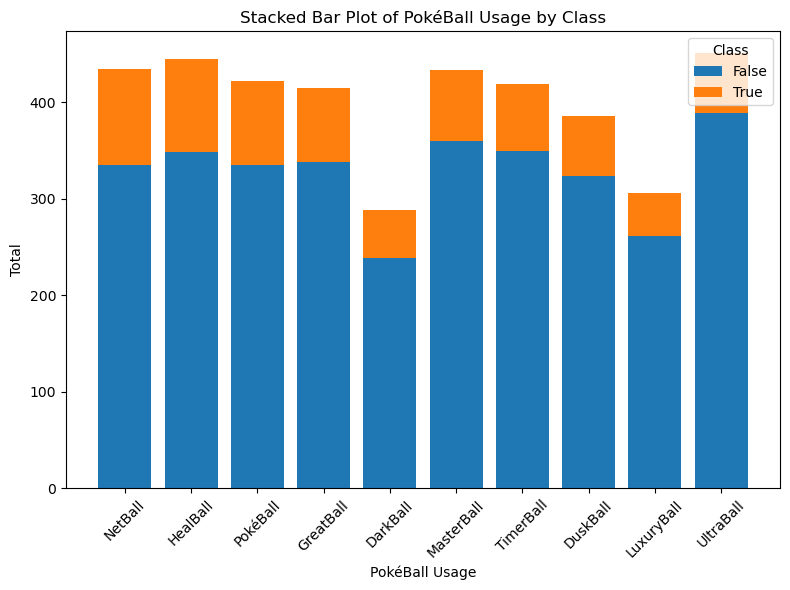

In [15]:
import matplotlib.pyplot as plt

# Assume this is your processed DataFrame
df = results['percentages']['PokéBall Usage']  # This should be a DataFrame
df = df.reset_index()  # If 'PokéBall Usage' is an index
df.columns.name = None  # Remove any column name grouping


# Plot
fig, ax = plt.subplots(figsize=(8, 6))
categories = df['PokéBall Usage']
false_vals = df[False]
true_vals = df[True]

# Stacked bars
ax.bar(categories, false_vals, label='False')
ax.bar(categories, true_vals, bottom=false_vals, label='True')

# Labels and legend
ax.set_ylabel('Total')
ax.set_xlabel('PokéBall Usage')
ax.set_title('Stacked Bar Plot of PokéBall Usage by Class')
ax.legend(title='Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can see that Team Rocket tend to use NetBall, HealBall, PokeBall with 20% of the category Team Rocket

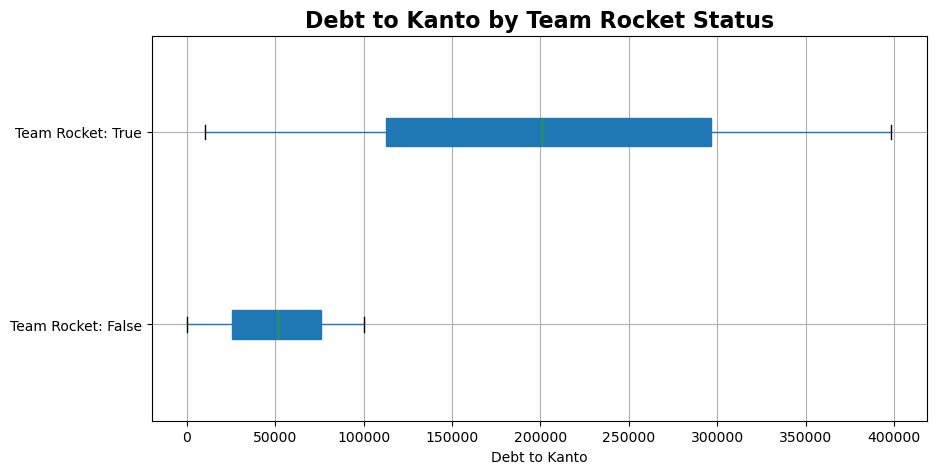

In [16]:
# Prepare the DataFrame
df_temp = df_train.query("`Team Rocket` in [True, False]")[['Team Rocket', 'Debt to Kanto']]

# Pivot so each group is a column
df_pivot = df_temp.pivot(columns='Team Rocket', values='Debt to Kanto')

# Rename columns for clarity
df_pivot.columns = ['Team Rocket: False', 'Team Rocket: True']

# Now plot
df_pivot.boxplot(vert=False, figsize=(10, 5), patch_artist=True)

plt.title('Debt to Kanto by Team Rocket Status', fontsize=16, fontweight='bold')
plt.xlabel('Debt to Kanto')
plt.show()


There appears to be a tendency for Team Rocket members to have higher levels of debt compared to those who are not part of the group.

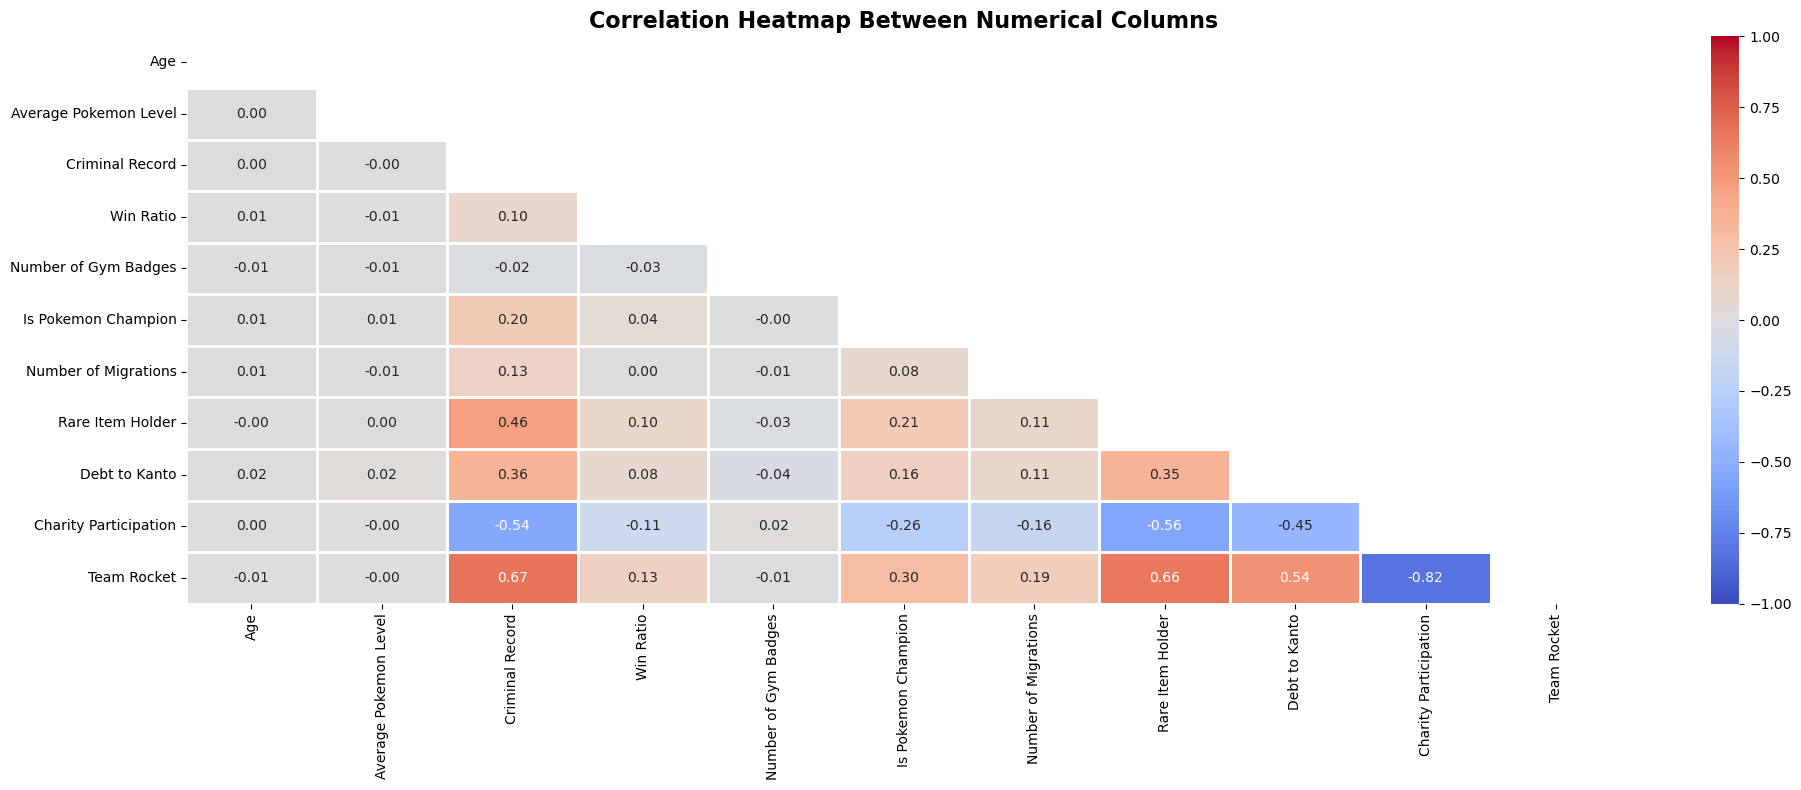

Team Rocket and Charity Participation — correlation = -0.82
Team Rocket and Criminal Record — correlation = 0.67
Team Rocket and Rare Item Holder — correlation = 0.66


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_highly_correlated_features(df, drop_cols=None, threshold=0.6, method='spearman'):
    """
    Find pairs of numerical features with correlation higher than a specified threshold
    and show the correlation heatmap.

    Parameters:
    - df: DataFrame
    - drop_cols: List of columns to drop before correlation (e.g., target columns like 'Attrition')
    - threshold: Correlation threshold to consider features highly correlated
    - method: Correlation method ('pearson', 'spearman', or 'kendall')

    Returns:
    - A sorted list of tuples: (Feature 1, Feature 2, Correlation Value)
    """

    if drop_cols is None:
        drop_cols = []

    # Drop specified columns and select numeric types
    corr_df = df.drop(columns=drop_cols).corr(numeric_only=True, method=method)

    # Create a mask for the lower triangle (exclude self-correlation on diagonal)
    mask = np.tril(np.ones(corr_df.shape), k=-1).astype(bool)

    # Find pairs above the threshold
    high_corr_pairs = [
        (col, row, corr_df.loc[row, col])
        for col in corr_df.columns
        for row in corr_df.index
        if mask[corr_df.columns.get_loc(col), corr_df.index.get_loc(row)] and
           pd.notnull(corr_df.loc[row, col]) and abs(corr_df.loc[row, col]) > threshold
    ]

    # Sort by correlation value descending
    high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)   
     
    # Plot heatmap
    plt.figure(figsize=(20, 8))
    sns.heatmap(
        corr_df, vmin=-1, vmax=1, center=0,
        cmap='coolwarm', mask=~mask,  # mask the upper triangle + diagonal
        annot=True, fmt=".2f", linewidths=1, linecolor='white'
    )
    plt.xticks(rotation=90)
    plt.title("Correlation Heatmap Between Numerical Columns", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    # Show results
    for feat1, feat2, corr_value in high_corr_pairs:
        print(f"{feat1} and {feat2} — correlation = {corr_value:.2f}")
    return high_corr_pairs

# Example
high_corr_features = find_highly_correlated_features(
    df_train, 
    drop_cols=[], 
    threshold=0.6, 
    method='spearman'
)

Target Highly Corelated with Charity Participant, we will keep this because it affect the prediction so much

## Data Splitting

In [18]:
def define_X_y(df, target='Attrition', drop_cols=['EmpID']):
    X = df.drop(columns=drop_cols + [target])
    y = df[target]
    return X, y

X, y = define_X_y(df_train, target='Team Rocket', drop_cols=[])

def check_class_balance(df, target='Attrition'):
    """
    Check class imbalance and categorize its severity.

    Parameters:
    - df: DataFrame
    - target: Target column to evaluate (default 'Attrition')

    Returns:
    - Dictionary with details about class balance
    """

    class_1 = (df[target].astype('bool') == True).sum()
    class_0 = (df[target].astype('bool') == False).sum()

    if class_1 == class_0:
        print('✅ The data is perfectly balanced.')
        severity = 'Balanced'
    else:
        # Identify minority class and percentage
        minority_class_count = min(class_1, class_0)
        percentage = round(minority_class_count / df.shape[0] * 100, 2)

        print(f"⚠️ Data is Imbalanced.")
        print(f"Class 0 (False): {class_0}")
        print(f"Class 1 (True): {class_1}")
        print(f"Minority Class Percentage: {percentage}%")

        # Determine severity
        if 20 < percentage < 40:
            severity = 'Mild'
        elif 1 < percentage <= 20:
            severity = 'Moderate'
        elif percentage <= 1:
            severity = 'Extreme'
        else:
            severity = 'Balanced'  # This will catch cases where percentage > 40

        print(f"Severity of imbalance: {severity}")

check_class_balance(df_train, target='Team Rocket')


⚠️ Data is Imbalanced.
Class 0 (False): 3280
Class 1 (True): 720
Minority Class Percentage: 18.0%
Severity of imbalance: Moderate


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y # make sure the distribution in y the same
)

print('Data Splitting Preview')
pd.DataFrame({
    'Category' : ['X_train', 'y_train', 'X_test', 'y_test'],
    'Row' : [X_train.shape[0],  y_train.shape[0], X_test.shape[0], y_test.shape[0]],
    'Column' : [int(X_train.shape[1]), 1, int(X_test.shape[1]), 1]
})

Data Splitting Preview


,Category,Row,Column
0,X_train,3200,16
1,y_train,3200,1
2,X_test,800,16
3,y_test,800,1


In [20]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # For imbalanced datasets

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MinMaxScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


One_Hot = ['City','Economic Status','Profession','Most Used Pokemon Type','Criminal Record','PokéBall Usage','Number of Gym Badges','Battle Strategy','Rare Item Holder','Charity Participation']
Robust = ['Age','Average Pokemon Level','Win Ratio','Is Pokemon Champion','Number of Migrations','Debt to Kanto']

transformer = ColumnTransformer([
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False), One_Hot)
])


In [21]:
transformer.fit_transform(X_train)

array([[-0.7       , -0.60416667, -0.53030303, ...,  1.        ,
         1.        ,  0.        ],
       [-0.2       ,  0.125     ,  0.22727273, ...,  1.        ,
         0.        ,  1.        ],
       [-0.53333333,  0.1875    , -0.37878788, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.76666667, -0.77083333, -0.07575758, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.10416667, -0.65151515, ...,  1.        ,
         0.        ,  1.        ],
       [-0.66666667,  0.58333333,  0.25757576, ...,  0.        ,
         0.        ,  1.        ]])

## Cross Validation

In [22]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, make_scorer
)

def get_scorers(metrics=None, multiclass_auc='ovr'):
    all_scorers = {
        # Basic Metrics
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1": make_scorer(f1_score),
        
        # F-beta Variants
        "f2": make_scorer(fbeta_score, beta=2),
        "f1.5": make_scorer(fbeta_score, beta=1.5),
        "f0.5": make_scorer(fbeta_score, beta=0.5),
        
        # ROC-AUC (requires predict_proba)
        "roc_auc": make_scorer(roc_auc_score, multi_class=multiclass_auc, needs_proba=True),
    }
    
    if metrics is None:
        return all_scorers
    else:
        return {name: all_scorers[name] for name in metrics if name in all_scorers}

# Choose what scorer you will use ['accuracy','precision','recall','f1','f2','f1.5','f0.5','roc_auc']
scorers = get_scorers(metrics=['accuracy','f1','f2','recall']) # fill here
scorers


{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'f1': make_scorer(f1_score, response_method='predict'),
 'f2': make_scorer(fbeta_score, response_method='predict', beta=2),
 'recall': make_scorer(recall_score, response_method='predict')}

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV

# Define classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42,verbose=-1)
catboost = CatBoostClassifier(random_state=42, verbose=0)
knn = KNeighborsClassifier()


# Define models (including Voting Classifier)
models = {
    "Logistic_Regression": log_reg,
    "Decision_Tree": decision_tree,
    "Random_Forest": random_forest,
    "Gradient_Boosting": gradient_boosting,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "KNN": knn,
    "Voting_Classifier": VotingClassifier(estimators=[
        # ('clf1', log_reg),
        ('clf2', random_forest),
        ('clf3', lightgbm),
        ('clf4', catboost),
        ('clf5', xgboost)
    ])
}

results = []
for model_name, model in models.items():
    # Check if 'roc_auc' is in the scorers
    if 'roc_auc' in scorers:
        # Ensure the model has predict_proba, which is required for roc_auc
        if not hasattr(model, "predict_proba"):
            print(f"Skipping ROC AUC for {model_name} because it doesn't support predict_proba.")
            scorers.pop('roc_auc', None)  # Remove roc_auc from the scoring if not supported

    # Build the pipeline
    pipe = Pipeline([
        ('scaling', transformer),
        ('model', model)
    ])
    
    # Run cross-validation with multiple scorers
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)
    
    # Start building the result dictionary with model name
    result_dict = {"Model": model_name}
    
    # Loop through each scorer to get mean and std values
    for scorer in scorers:
        result_dict[f"{scorer.capitalize()} Mean"] = cv_results[f"test_{scorer}"].mean()
        result_dict[f"{scorer.capitalize()} Std"] = cv_results[f"test_{scorer}"].std()
    
    # Append the result dictionary to the results list
    results.append(result_dict)

# Convert to DataFrame, change the order by scorer you choose
df_results = pd.DataFrame(results).sort_values(by="F2 Mean", ascending=False)

# Print results
df_results


,Model,Accuracy Mean,Accuracy Std,F1 Mean,F1 Std,F2 Mean,F2 Std,Recall Mean,Recall Std
1,Decision_Tree,0.995937,0.002898,0.988714,0.007996,0.988198,0.009942,0.987871,0.011743
6,CatBoost,0.997188,0.002296,0.992093,0.006488,0.987449,0.010268,0.984393,0.012743
3,Gradient_Boosting,0.996250,0.002539,0.989472,0.007228,0.986391,0.012847,0.984393,0.016834
2,Random_Forest,0.996875,0.002795,0.991189,0.007942,0.986036,0.012536,0.982654,0.015530
5,LightGBM,0.996875,0.002795,0.991189,0.007942,0.986036,0.012536,0.982654,0.015530
8,Voting_Classifier,0.996562,0.003337,0.990276,0.009534,0.984617,0.015004,0.980915,0.018552
4,XGBoost,0.994688,0.002539,0.984966,0.007294,0.976211,0.011453,0.970480,0.014140
0,Logistic_Regression,0.987500,0.001712,0.963994,0.005187,0.943633,0.007931,0.930540,0.009623
7,KNN,0.942812,0.004901,0.810789,0.019792,0.728398,0.025374,0.682249,0.027715


In [26]:
df_results.iloc[0]['Model']

'Decision_Tree'

In [27]:
# Select model and scorer
SELECTED_MODEL = df_results.iloc[0]['Model']
# Model Avaiable : Logistic_Regression, "Decision_Tree", "Random_Forest", "Gradient_Boosting", "XGBoost", "LightGBM", "CatBoost", "KNN", "Voting_Classifier"

SELECTED_SCORER = 'f2'  # Change this to any key from scorers dictionary (choose only 1 to focus)
# Scorer Available = "accuracy","precision","recall","f1","f2","f1.5","f0.5","roc_auc"


======================== EVALUATION RESULTS =========================
│ Model:          DECISION_TREE                                     │
│ Stage:          Before Tuning                                     │
│ Metric:         fbeta_score β=2                                   │
│ CV Scores:      [0.9741 0.9983 0.979  0.9913 0.9983]              │
│ CV Mean:        0.9882 ± 0.0099                                   │
---------------------------------------------------------------------
│ Train Score:    1.0                                               │
│ Test Score:     0.9763                                            │

Confusion Matrix (Test Set):


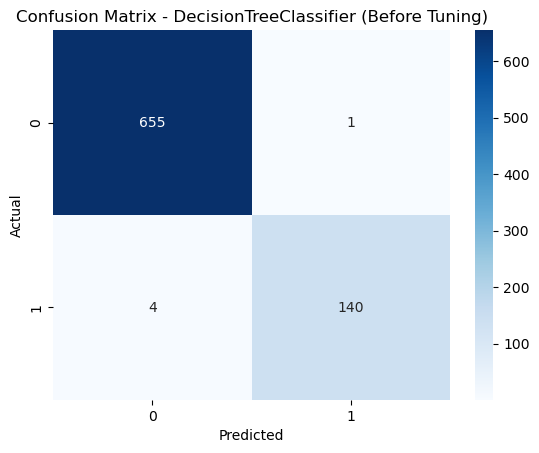

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    fbeta_score, confusion_matrix, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(pipe, X_train, y_train, X_test, y_test, scorer, status):
    """
    Evaluate a classification pipeline using cross-validation and F-beta score.
    Optionally display precision, recall, and F1-score.

    Parameters:
    - pipe: scikit-learn Pipeline
    - X_train, y_train: Training data
    - X_test, y_test: Test data (only used for final evaluation)
    - scorer: scoring function (e.g., from make_scorer)
    - status: string indicating evaluation context ('Before' or 'After')
    """
    metric_name = scorer._score_func.__name__
    beta = scorer._kwargs.get('beta')  # Get beta from scorer if exists
    
    # Cross-validation (safe - only uses training data)
    cv_scores = cross_val_score(
        pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=scorer,
        groups=X_train.index if hasattr(X_train, 'index') else None
    )

    # Fit and predict (proper train-test separation)
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)  # For training metric calculation

    # Calculate metrics    
    if metric_name == 'fbeta_score':
        train_metric = fbeta_score(y_train, y_pred_train, beta=beta)
        test_metric = fbeta_score(y_test, y_pred_test, beta=beta)
    elif metric_name == 'precision_score':
        train_metric = precision_score(y_train, y_pred_train)
        test_metric = precision_score(y_test, y_pred_test)
    elif metric_name == 'recall_score':
        train_metric = recall_score(y_train, y_pred_train)
        test_metric = recall_score(y_test, y_pred_test)
    elif metric_name == 'f1_score':
        train_metric = f1_score(y_train, y_pred_train)
        test_metric = f1_score(y_test, y_pred_test)
    elif metric_name == 'accuracy_score':
        train_metric = accuracy_score(y_train, y_pred_train)
        test_metric = accuracy_score(y_test, y_pred_test)
    elif metric_name == 'roc_auc_score':
        # Use predicted probabilities for ROC AUC
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        train_metric = roc_auc_score(y_train, y_pred_proba_train)
        test_metric = roc_auc_score(y_test, y_pred_proba_test)
    else:
        raise ValueError(f"Unsupported metric: {metric_name}")

    print(f"\n{' EVALUATION RESULTS ':=^69}")
    print(f"│ {'Model:':<15} {SELECTED_MODEL.upper():<50}│")
    print(f"│ {'Stage:':<15} {status:<50}│")
    beta_display = f"β={beta}" if beta is not None else ""

    print(f"│ {'Metric:':<15} {metric_name + ' ' + beta_display:<50}│")
    print(f"│ {'CV Scores:':<15} {str(np.round(cv_scores, 4)):<50}│")
    print(f"│ {'CV Mean:':<15} {str(round(np.mean(cv_scores),4))+ ' ± ' +str(round(np.std(cv_scores),4)):<50}│")
    print(f"{'':-^69}")
    print(f"│ {'Train Score:':<15} {str(round(train_metric,4)):<50}│")
    print(f"│ {'Test Score:':<15} {str(round(test_metric,4)):<50}│")
    print(f"{'':=^69}")

    # Confusion Matrix (test set only)
    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix - {type(pipe.steps[-1][1]).__name__} ({status})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return [cm,test_metric]

# Before tuning
pipe_basic = Pipeline([
    ('scaling', transformer),
    ('modeling', models[SELECTED_MODEL])
])

base_cm = evaluate_model(pipe_basic, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='Before Tuning')

## Hyperparameter Tuning

In [585]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

from scipy.stats import loguniform, randint, uniform
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions for each model type
param_distributions = {
    'Logistic_Regression': {
        'resampler': list(resampling_methods.values()),
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga'],
        'model__max_iter': [100, 500, 1000]
    },
    'Decision_Tree': {
        'resampler': list(resampling_methods.values()),
        'model__max_depth': [3, 5, 10, 15, 20, None],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 5, 10],
        'model__criterion': ['gini', 'entropy']
    },
    'Random_Forest': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [3, 5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 5, 10],
        'model__max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 'sqrt', 'log2']
    },
    'Gradient_Boosting': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
        'model__max_depth': [3, 5, 7, 10],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 5, 10],
        'model__subsample': [0.5, 0.7, 0.9, 1.0]
    },
    'XGBoost': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [3, 5, 7, 10],
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
        'model__subsample': [0.5, 0.7, 0.9, 1.0],
        'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0]
    },
    'LightGBM': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],
        'model__max_depth': [3, 5, 7, 10, 12],
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
        'model__num_leaves': [20, 31, 50, 100],
        'model__min_child_samples': [5, 10, 20, 30]
    },
    'CatBoost': {
        'resampler': list(resampling_methods.values()),
        'model__iterations': [50, 100, 200, 500],
        'model__depth': [3, 5, 7, 10],
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],
        'model__l2_leaf_reg': [0.001, 0.01, 0.1, 1, 10]
    },
    'KNN': {
        'resampler': list(resampling_methods.values()),
        'model__n_neighbors': [3, 5, 10, 15, 20, 25, 30],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2, 3]
    }
}

# Create pipeline
pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', None),  # Will be set by RandomizedSearchCV
    ('model', models[SELECTED_MODEL])
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions[SELECTED_MODEL],
    n_iter=100,
    scoring=scorers[SELECTED_SCORER],
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


grid_search = GridSearchCV(
    estimator = pipe,
    cv = 5,
    scoring = scorers[SELECTED_SCORER],
    refit=True,  # Uses the same metric as scoring
    n_jobs= -1,
    param_grid= param_distributions[SELECTED_MODEL]   
)

# Fit the model
selected_search = grid_search # choose here between random_search or grid_search
selected_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", selected_search.best_params_)
print("Best score:", selected_search.best_score_)
best_model = selected_search.best_estimator_

Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'resampler': None}
Best score: 0.9899037999516981


In [586]:
result_test = pd.DataFrame(selected_search.cv_results_).sort_values(by='rank_test_score',ascending=True).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']).head(3)
front_cols = ['rank_test_score', 'mean_test_score', 'std_test_score']
result_test = result_test[front_cols + [col for col in result_test.columns if col not in front_cols]]
print(f'Model : {SELECTED_MODEL}, Main Scorer : {SELECTED_SCORER}')
result_test

Model : Decision_Tree, Main Scorer : f2


,rank_test_score,mean_test_score,std_test_score,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_resampler,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
645,1,0.989904,0.009106,entropy,10,1,5,None,0.979203,1.0,0.979021,0.993031,0.998264
655,1,0.989904,0.009106,entropy,10,1,20,None,0.979203,1.0,0.979021,0.993031,0.998264
650,1,0.989904,0.009106,entropy,10,1,10,None,0.979203,1.0,0.979021,0.993031,0.998264



======================== EVALUATION RESULTS =========================
│ Model:          DECISION_TREE                                     │
│ Stage:          After Tuning                                      │
│ Metric:         fbeta_score β=2                                   │
│ CV Scores:      [0.9792 1.     0.979  0.993  0.9983]              │
│ CV Mean:        0.9899 ± 0.0091                                   │
---------------------------------------------------------------------
│ Train Score:    0.9944                                            │
│ Test Score:     0.9777                                            │

Confusion Matrix (Test Set):


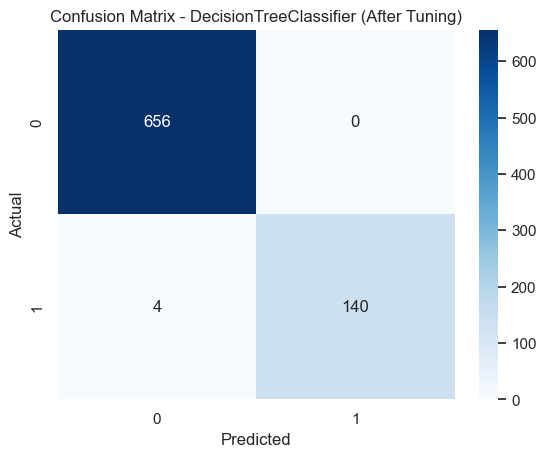

In [587]:
# After tuning
pipe_tune = best_model

tuned_cm = evaluate_model(pipe_tune, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='After Tuning')


## Comparing Result

Score Before : 0.9763, After : 0.9777, Improvement : 0.14 %


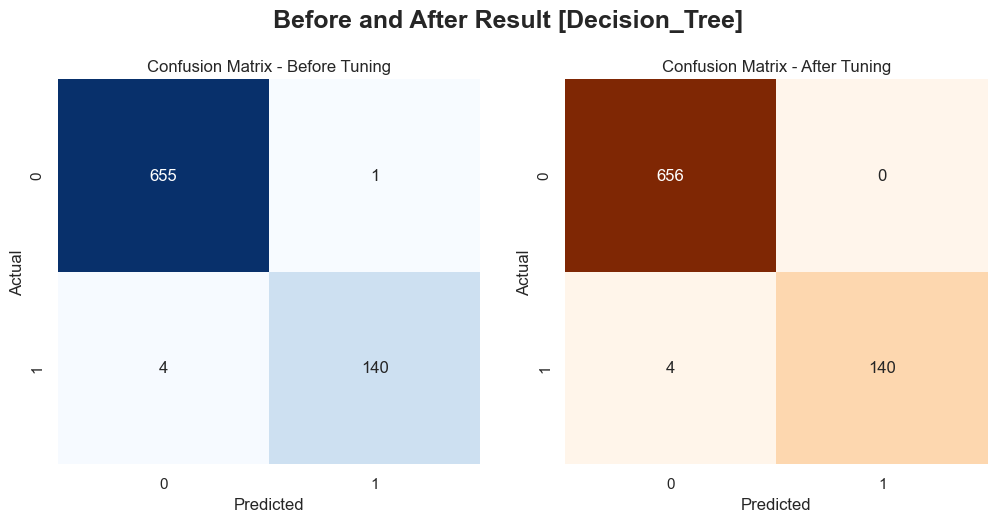

In [588]:
print(f'Score Before : {round(base_cm[1],4)}, After : {round(tuned_cm[1],4)}, Improvement : {round((tuned_cm[1]-base_cm[1])/base_cm[1]*100,2)} %')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(base_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title("Confusion Matrix - Before Tuning")
axes[0].set_xlabel("Predicted")  # Fixed: using set_xlabel() method
axes[0].set_ylabel("Actual")     # Fixed: using set_ylabel() method

# Confusion Matrix After Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[1], cmap='Oranges', cbar=False)
axes[1].set_title("Confusion Matrix - After Tuning")
axes[1].set_xlabel("Predicted")  # Added xlabel for second plot
axes[1].set_ylabel("Actual")           # Clear ylabel for second plot to avoid duplication

fig.suptitle(f'Before and After Result [{SELECTED_MODEL}]', fontsize=18, fontweight='bold', y=1.02)
# plt.tight_layout()
plt.show()

We succesfully improve by reducing 1 False Positive in our model

## Threshold Optimization

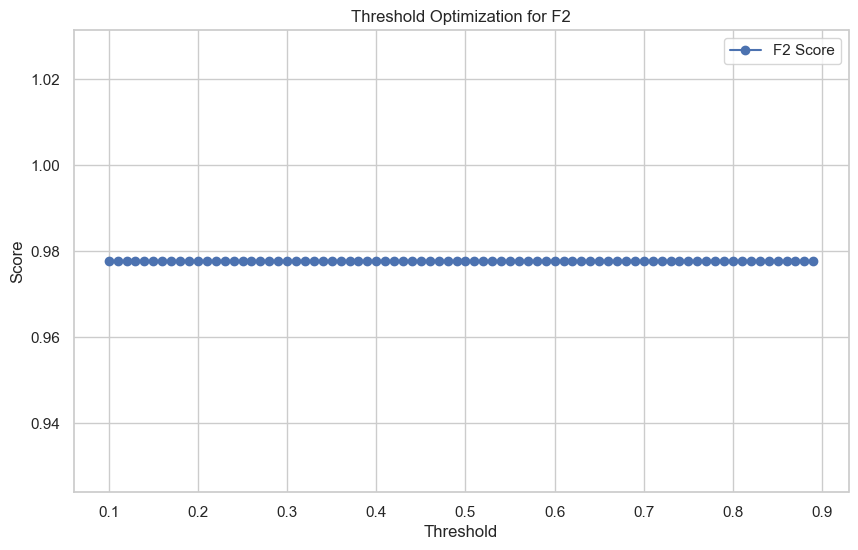


🔍 Best Threshold for F2: 0.10

📊 Confusion Matrix:
[[656   0]
 [  4 140]]

📄 Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       656
        True       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800



In [589]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
)

# Fit the model
best_model.fit(X_train, y_train)

# Get probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Threshold range
thresholds = np.arange(0.1, 0.9, 0.01)

# Collect scores
scores = []

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)

    if SELECTED_SCORER == 'precision':
        scores.append(precision_score(y_test, y_pred))
    elif SELECTED_SCORER == 'recall':
        scores.append(recall_score(y_test, y_pred))
    elif SELECTED_SCORER == 'accuracy':
        scores.append(accuracy_score(y_test, y_pred))
    elif SELECTED_SCORER == 'roc_auc':
        scores.append(roc_auc_score(y_test, y_prob))  # Note: not threshold-based
    elif SELECTED_SCORER.startswith('f'):
        beta = float(SELECTED_SCORER[1:]) if SELECTED_SCORER != 'f1' else 1.0
        scores.append(fbeta_score(y_test, y_pred, beta=beta))
    else:
        raise ValueError("Unsupported scorer. Choose from 'f1', 'f1.5', 'f2', 'precision', 'recall', 'accuracy', 'roc_auc'.")

# Plot (skip threshold-dependent plot for ROC AUC)
if SELECTED_SCORER != 'roc_auc':
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, scores, label=f'{SELECTED_SCORER.upper()} Score', marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Threshold Optimization for {SELECTED_SCORER.upper()}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Best threshold based on selected scorer
    best_threshold = thresholds[np.argmax(scores)]
else:
    # Use default threshold 0.5 for ROC AUC
    best_threshold = 0.5

print(f"\n🔍 Best Threshold for {SELECTED_SCORER.upper()}: {best_threshold:.2f}")

# Predict with best threshold
y_pred_adjusted = (y_prob > best_threshold).astype(int)

# Evaluation
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

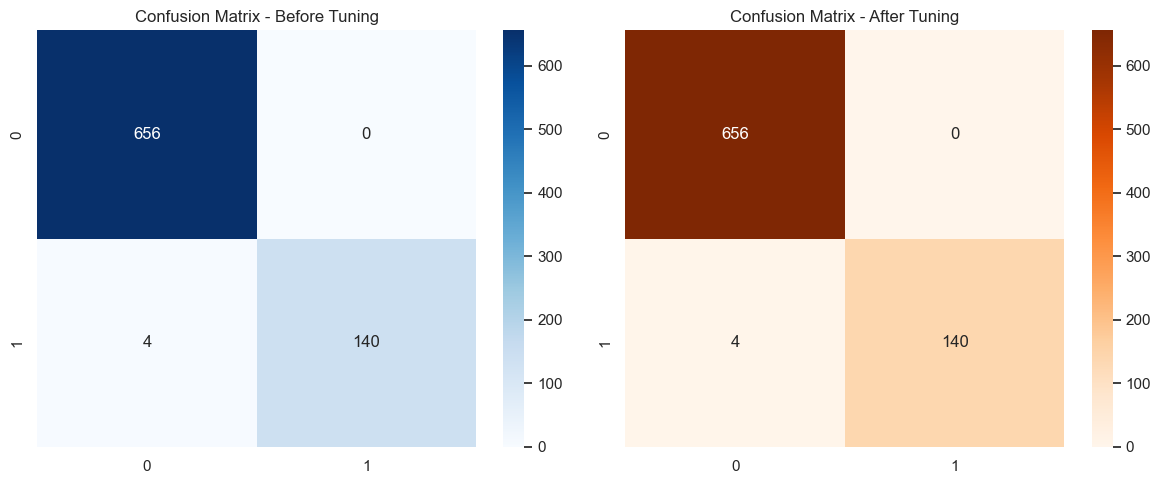

In [590]:
pipe_tune.fit(X_train, y_train)

y_pred_adjusted = (pipe_tune.predict_proba(X_test)[:, 1] > best_threshold ).astype(int)
y_pred_adjusted

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

Threshold doesn't change or improve the model, so we will stick to tuned model without threshold change

## Model Evaluation

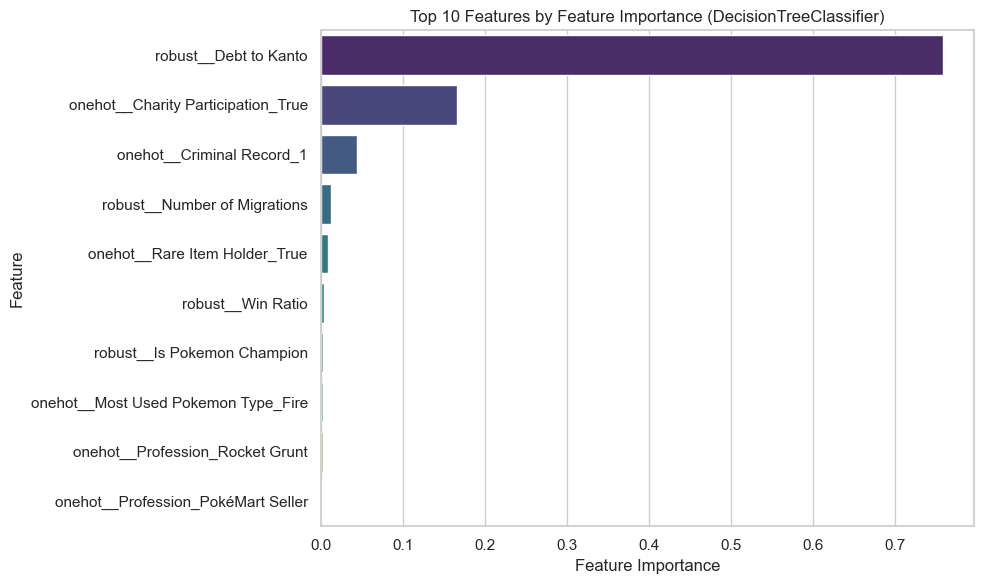

In [591]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model_pipeline, X, y, top_n=10, random_state=42):
    """
    Plots top N feature importances for various model types, including KNN.
    
    Parameters:
    - model_pipeline: A trained scikit-learn pipeline object
    - X: Feature matrix (pre-transformation)
    - y: Target vector
    - top_n: Number of top features to display
    - model_name: Name of the model (for the plot title)
    - random_state: Random seed for permutation importance
    """
    # Get transformed feature names
    try:
        feature_names = model_pipeline.named_steps['scaling'].get_feature_names_out()
    except AttributeError:
        feature_names = np.array([f'Feature {i}' for i in range(X.shape[1])])
    
    model = model_pipeline.named_steps['modeling']
    
    # Handle different model types
    if hasattr(model, 'coef_'):  # Linear models
        importances = np.abs(model.coef_[0])
        importance_type = "Coefficient Magnitude"
    elif hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
        importance_type = "Feature Importance"
    else:  # For KNN and other models without native importance
        # Calculate permutation importance
        X_transformed = model_pipeline.named_steps['scaling'].transform(X)
        result = permutation_importance(
            model, X_transformed, y, 
            n_repeats=10, 
            random_state=random_state
        )
        importances = result.importances_mean
        importance_type = "Permutation Importance"
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Importance_Type': importance_type
    }).sort_values('Importance', ascending=False)

    # # Display top N
    # print(f"\nTop {top_n} Features by {importance_type}:")
    # print(importance_df.head(top_n))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=importance_df.head(top_n), 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by {importance_type} ({type(model_pipeline.steps[-1][1]).__name__})')
    plt.xlabel(importance_type)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Usage example:
plot_feature_importance(
    pipe_basic, 
    X=X_train,  # Your raw training features (before scaling)
    y=y_train, 
    top_n=10)

SHAP summary plot for class: False


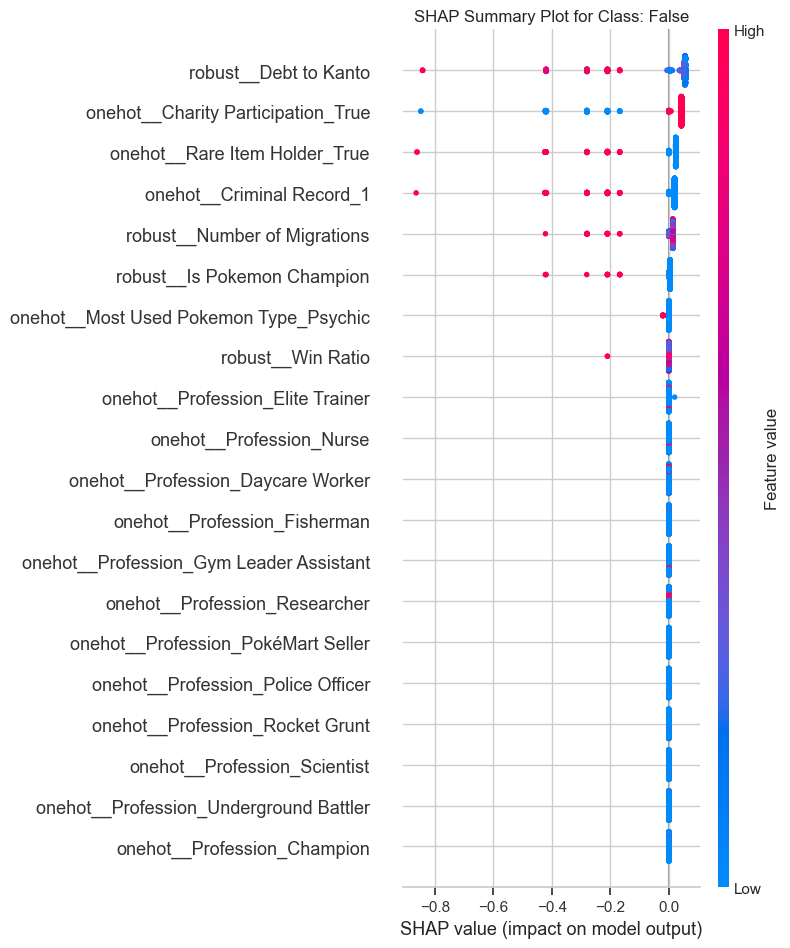

SHAP summary plot for class: True


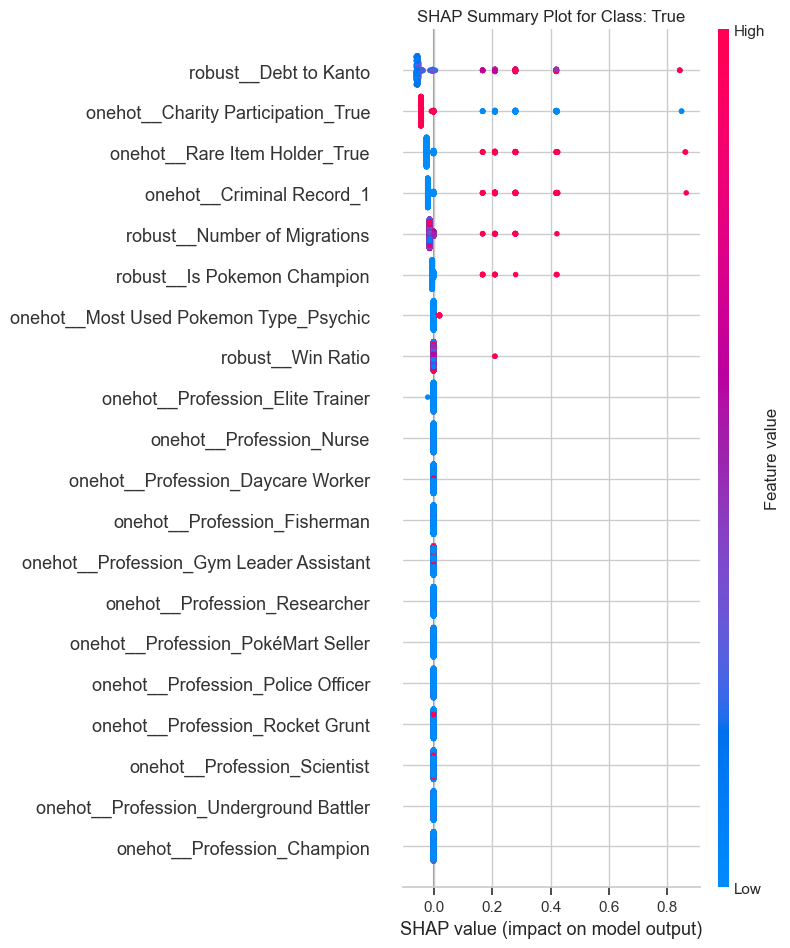

In [592]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the preprocessing transformer and trained model from the pipeline
preprocessor = pipe_tune.named_steps['transformer']
model = pipe_tune.named_steps['model']

# Transform the test set using the pipeline's transformer
X_test_transformed = preprocessor.transform(X_test)

# Extract feature names after transformation
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_test.columns  # fallback

# Convert to dense if sparse
if hasattr(X_test_transformed, 'toarray'):
    X_test_transformed = X_test_transformed.toarray()

# Create DataFrame from transformed input
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Create SHAP explainer
explainer = shap.Explainer(model, X_test_df)

# Compute SHAP values
shap_values = explainer(X_test_df)

# Handle different SHAP output shapes
if hasattr(shap_values, 'values'):  # Newer SHAP objects
    values = shap_values.values
    if values.ndim == 3:
        # Multi-class case — plot per class
        for i, class_name in enumerate(model.classes_):
            print(f"SHAP summary plot for class: {class_name}")
            shap.summary_plot(values[:, :, i], X_test_df, show=False)
            plt.title(f"SHAP Summary Plot for Class: {class_name}")
            plt.show()
    else:
        # Binary classification or regression
        shap.summary_plot(values, X_test_df)
else:
    # Legacy list-based SHAP values (e.g. TreeExplainer)
    if isinstance(shap_values, list):
        for i, class_name in enumerate(model.classes_):
            print(f"SHAP summary plot for class: {class_name}")
            shap.summary_plot(shap_values[i], X_test_df, show=False)
            plt.title(f"SHAP Summary Plot for Class: {class_name}")
            plt.show()
    else:
        shap.summary_plot(shap_values, X_test_df)


Insight :

- Debt to Kanto, Charity Participation, Rare Item and Criminal Record contribute the most to predict class 1 in this model

- The higher Debt the more model tend to predict class 1

- Person that doesn't do Charity will most likely to predict class 1

- Person that use Rare Ite, and got Criminal Record tend to predict class 1

## Conclusion

This model succefully detect all False Positive which is Model Predict Team Rocket but actually no,

but only 4 data is False negative, model predict it's not Team Rocket but actually Yes

In [593]:
import pickle

# Save model

#fit
best_model.fit(X, y)

# save with pickle
pickle.dump(best_model, open('Prediction Model.sav', 'wb'))

In [594]:
# Load model
filename = 'Prediction Model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['Age',
                                                   'Average Pokemon Level',
                                                   'Win Ratio',
                                                   'Is Pokemon Champion',
                                                   'Number of Migrations',
                                                   'Debt to Kanto']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['City', 'Economic Status',
                                                   'Profession',
                                                   'Most Used Pokemon Type',
                                                   'Criminal Record',
                                                   'PokéBall Usage',
                                                   'Number of Gym Badges',
                                                   'Battle Strategy',
                                                   'Rare Item Holder',
                                                   'Charity Participation'])])),
                ('resampler', None),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=42))])

## Predict to Test Data

In [598]:
df_test.drop(columns='Team Rocket')

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation
4000,29,Pallet Town,Low,Scientist,Fighting,70,0,UltraBall,63,3,False,Aggressive,10,False,61828,True
4001,64,Cerulean City,Middle,Researcher,Electric,83,0,UltraBall,84,4,False,Unpredictable,6,False,43359,True
4002,36,Viridian City,Middle,Researcher,Fire,90,0,TimerBall,42,4,False,Aggressive,23,False,51054,True
4003,22,Viridian City,Low,Underground Battler,Ice,66,1,DuskBall,43,3,False,Unpredictable,27,True,153681,False
4004,44,Lavender Town,Middle,PokéMart Seller,Poison,69,0,LuxuryBall,20,2,False,Defensive,14,False,38953,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,Researcher,Rock,91,0,LuxuryBall,53,5,False,Defensive,5,False,70192,True
4996,17,Vermilion City,Middle,Gym Leader Assistant,Dragon,23,0,PokéBall,40,0,False,Defensive,1,False,43208,True
4997,67,Fuchsia City,High,Elite Trainer,Dark,13,0,UltraBall,36,0,False,Defensive,25,False,47794,True
4998,43,Viridian City,Middle,Daycare Worker,Poison,48,0,MasterBall,51,4,False,Defensive,4,False,10995,True


In [599]:
prediction = loaded_model.predict(df_test.drop(columns='Team Rocket'))
df_test['Team Rocket'] = prediction
df_test

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
4000,29,Pallet Town,Low,Scientist,Fighting,70,0,UltraBall,63,3,False,Aggressive,10,False,61828,True,False
4001,64,Cerulean City,Middle,Researcher,Electric,83,0,UltraBall,84,4,False,Unpredictable,6,False,43359,True,False
4002,36,Viridian City,Middle,Researcher,Fire,90,0,TimerBall,42,4,False,Aggressive,23,False,51054,True,False
4003,22,Viridian City,Low,Underground Battler,Ice,66,1,DuskBall,43,3,False,Unpredictable,27,True,153681,False,True
4004,44,Lavender Town,Middle,PokéMart Seller,Poison,69,0,LuxuryBall,20,2,False,Defensive,14,False,38953,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36,Viridian City,Middle,Researcher,Rock,91,0,LuxuryBall,53,5,False,Defensive,5,False,70192,True,False
4996,17,Vermilion City,Middle,Gym Leader Assistant,Dragon,23,0,PokéBall,40,0,False,Defensive,1,False,43208,True,False
4997,67,Fuchsia City,High,Elite Trainer,Dark,13,0,UltraBall,36,0,False,Defensive,25,False,47794,True,False
4998,43,Viridian City,Middle,Daycare Worker,Poison,48,0,MasterBall,51,4,False,Defensive,4,False,10995,True,False


In [600]:
df_test[df_test['Team Rocket']==True].shape

(99, 17)

In [601]:
df_test[df_test['Team Rocket']==False].shape[0]

901

# **Creating Dataset for Dashboard**

In this part we will create a add on column to be used in Tableau

You can check the final result [here]('https://public.tableau.com/app/profile/glen.joy2546/viz/CivDexAIPredictionTools/Dashboard?publish=yes)

![Dashboard](Streamlit/image/Dashboard.png)


# Creating Randomized Profile Picture

In [33]:
import random

my_list = [1,2]
if df_test.iloc[0]['Team Rocket'] == 0:
    print(random.choice(my_list))
else :
    print('Team Rocket')

Team Rocket


In [34]:
import random

# If Team Rocket give code 0, else random choose from 1 or 2

my_list = [1,2]
list_random =[]

for x in df_train['Team Rocket']:
    if x == 1 :
        list_random.append(0)
    elif x == 0 :
        list_random.append(random.choice(my_list))

len(list_random)

4000

In [608]:
df_dashboard = df_train
df_dashboard['Profile'] = list_random
df_dashboard

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket,Profile
0,27,Pewter City,Middle,Fisherman,Rock,50,0,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False,2
1,55,Viridian City,Middle,PokéMart Seller,Grass,35,1,HealBall,53,2,False,Unpredictable,19,False,177516,True,True,0
2,14,Pallet Town,High,Police Officer,Poison,96,0,NetBall,76,5,False,Aggressive,18,False,85695,True,False,2
3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,0,UltraBall,27,0,False,Defensive,10,False,39739,True,False,2
4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,1,HealBall,51,1,False,Aggressive,17,True,126923,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,30,Viridian City,Low,Rocket Grunt,Steel,28,0,TimerBall,41,0,False,Unpredictable,13,False,92903,True,False,2
3996,20,Cerulean City,Low,Casino Worker,Electric,100,0,UltraBall,65,3,False,Unpredictable,7,False,27555,True,False,1
3997,27,Fuchsia City,Middle,Scientist,Rock,49,0,MasterBall,60,1,False,Unpredictable,4,False,34772,True,False,2
3998,66,Vermilion City,Low,Rocket Grunt,Electric,58,0,DuskBall,61,8,False,Defensive,12,False,70341,True,False,1


In [609]:
df_dashboard= df_dashboard.reset_index().rename(columns={'index':'ID'})

In [610]:
df_dashboard.to_csv('dataset_dashboard.csv',index=False)

# Creating Guessing Game using Model

In [35]:
import pickle


filename = 'Prediction Model.sav'

# Load model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

df = pd.read_csv('dataset_test.csv')

import pandas as pd

# Load test data
df_test = pd.read_csv('dataset_test.csv')


# Make prediction
predictions = loaded_model.predict(df_test)
predictions

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [36]:
loaded_model.predict_proba(df_test)

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99336870e-01, 6.63129973e-04],
       ...,
       [9.99336870e-01, 6.63129973e-04],
       [9.99336870e-01, 6.63129973e-04],
       [9.79591837e-01, 2.04081633e-02]])

In [37]:
score = 0


In [43]:
# Number of samples you want from each class
n_samples_per_class = 50  # adjust this as needed

# Separate the classes
team_rocket_df = df[df['Team Rocket'] == True]
civilian_df = df[df['Team Rocket'] == False]

# Sample from each
sampled_team_rocket = team_rocket_df.sample(n=n_samples_per_class)
sampled_civilian = civilian_df.sample(n=n_samples_per_class)

# Combine into one balanced dataframe
balanced_df = pd.concat([sampled_team_rocket, sampled_civilian]).sample(frac=1).reset_index(drop=True)


button_Rocket = False
button_civilian = True

#Generate random number
random_index = random.randint(0, balanced_df.shape[0] - 1)
random_index

# Predict
prediction = loaded_model.predict(balanced_df.iloc[[random_index]])
proba = loaded_model.predict_proba(balanced_df.iloc[[random_index]])
display(balanced_df.iloc[[random_index]])

if prediction == 0 :
    proba_score = round(proba[0][0]/(proba[0][0]+proba[0][1])*100,2)
else :
    proba_score = round(proba[0][1]/(proba[0][0]+proba[0][1])*100,2)

# player = input('Team Rocket? 1/0')

if button_Rocket == True :
    player = 1
    player_guess = 'Team Rocket'
elif button_civilian == True :
    player = 0
    player_guess = 'Civilian'

predicted_class = "Team Rocket" if prediction[0] else "Civilian"

if int(prediction[0]) == int(player):
    print('You beat the Machine!')
    print(f'Machine Prediction : {predicted_class},{random_index}, Player Guess : {player_guess} , Proba : {proba_score}')
    score += 1
    print(score)
else :
    print('Your Prediction Different with Machine')
    print(f'Machine Prediction : {predicted_class},{random_index}, Player Guess : {player_guess}, Proba : {proba_score}')

,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
22,27,Fuchsia City,High,Police Officer,Water,83,0,UltraBall,54,0,False,Unpredictable,5,False,159715,False,True


Your Prediction Different with Machine
Machine Prediction : Team Rocket,22, Player Guess : Civilian, Proba : 100.0


## Generating Random Name for Person

In [ ]:
import random

def generate_realistic_name():
    # List of common first names
    first_names = [
        "John", "Michael", "David", "James", "Robert", "William", "Daniel", "Matthew", "Andrew", "Joseph",
        "Christopher", "Paul", "Mark", "Kevin", "Brian", "Thomas", "Charles", "Jason", "Richard", "Steven", "George",
        "Edward", "Brian", "Jacob", "Samuel", "Ryan", "Anthony", "Joshua", "Aaron", "Ethan", "Adam", "Henry"
    ]
    
    # List of common last names
    last_names = [
        "Smith", "Johnson", "Brown", "Williams", "Jones", "Miller", "Davis", "García", "Rodriguez", "Martínez",
        "Hernández", "Lopez", "Gonzalez", "Wilson", "Anderson", "Thomas", "Taylor", "Moore", "Jackson", "Martin",
        "Lee", "Perez", "White", "Harris", "Sanchez", "Clark", "Ramirez", "Lewis", "Roberts", "Walker", "Young"
    ]
    
    # Randomly select a first name and last name
    first_name = random.choice(first_names)
    last_name = random.choice(last_names)
    
    # Combine them into a full name
    return f"{first_name} {last_name}"


In [ ]:
name = []
for x in range(len(df_test)):
    name.append(generate_realistic_name())
len(name)

In [ ]:
df_test['Name'] = name
df_test

In [ ]:
df_test.to_csv('dataset_game.csv',index=False)

## Scrapping Website to Get Sprite for People

We will use BeautifulSoup to scrapping sprite of Pokemon game to be used in our guessing game

In [44]:
# check if URL can be scraped or not using BS
import requests

# Define the URL
url = "https://play.pokemonshowdown.com/sprites/trainers/"


# Fetch the page
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

Page fetched successfully!


In [48]:
import requests
from bs4 import BeautifulSoup

def image_person() :
    url = "https://play.pokemonshowdown.com/sprites/trainers/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    url3 = "https://play.pokemonshowdown.com/sprites/trainers/"

    page = requests.get(url3) #untuk download hmtl

    soup = BeautifulSoup(page.text,'html.parser')
    #merapihkan hasil download html menjadi sesuai div nya, format nya jadi bs4.BeautifulSoup bukan str
    type(soup)

    list_name = [x['src'] for x in soup.findAll('img')][1:]
    random.randint(0,len(list_name))
    choosen = list_name[random.randint(0,len(list_name))]
    link = f"https://play.pokemonshowdown.com/sprites/trainers/{choosen}"
    return link,list_name

In [50]:
image = image_person()

The rest of the code is on Streamlit .py file, you can see it [Github]('https://github.com/glenvj-j/CivDexAI-Predicting-Team-Rocket')

<hr>

# **CivDexAI the Game**

## **🎮 Ready to Play? [Click here to start the game!](https://civdexai-new.streamlit.app/)**

### 🕹️ How to Play

1. **Explore the Insights**  
   Start with the **Insight** tab in the sidebar to get familiar with the traits and behavior patterns of Team Rocket members.

2. **Analyze the Suspect**  
   Head over to **Test Your Skill** where a random character will appear. Review their profile carefully.

3. **Make Your Guess**  
   Decide: **Is this person a Team Rocket agent or not?** Trust your instincts—or the data!

4. **Challenge the AI**  
   Submit your guess and see if you can outsmart the machine’s prediction.

🧠 **Your score is tracked in the sidebar. See if you can beat the AI!**


![Homepage](Streamlit/image/Home.png)
![Game](Streamlit/image/Game.png)